In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, cross_val_predict, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('./data_train.csv')
train.head()

,ho,khac_dam,kho_khe,kho_tho,nang_nguc,mrc,thuoc_la,mui_hong,tim,phoi,nhom
0,2,2,2,1,1,3,1,0,0,2,D
1,1,1,0,0,1,1,1,0,0,2,A
2,0,0,1,1,0,2,1,0,0,2,B
3,2,2,2,2,0,2,1,0,0,3,D
4,2,2,1,2,0,2,1,0,0,3,D


In [ ]:
y = train['nhom'].copy()
X = train.drop(["nhom"], axis=1)

In [ ]:

X = pd.get_dummies(X) 
imputer = SimpleImputer(strategy = 'median')
X = pd.DataFrame(imputer.fit_transform(X))
scaler = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,0.5,0.5,0.75,1.0,0.0,0.0,0.333333
1,0.5,0.5,0.0,0.0,0.5,0.25,1.0,0.0,0.0,0.333333
2,0.0,0.0,0.5,0.5,0.0,0.50,1.0,0.0,0.0,0.333333
3,1.0,1.0,1.0,1.0,0.0,0.50,1.0,0.0,0.0,0.500000
4,1.0,1.0,0.5,1.0,0.0,0.50,1.0,0.0,0.0,0.500000


In [ ]:
model = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(16, 16, 16))

In [ ]:
cv_results = cross_validate(model, X, y, cv=5)
sorted(cv_results.keys())
cv_results['test_score']

array([0.88888889, 0.75      , 0.75      , 1.        , 0.625     ])

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.27)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


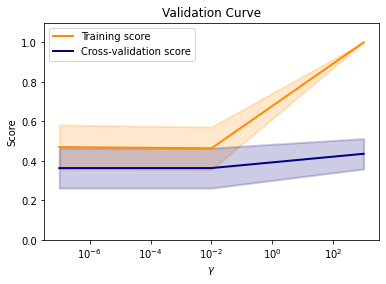

In [ ]:
param_range = np.logspace(-7, 3, 3)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()